# ## 1. 📂 Завантаження та попередній огляд даних

In [2]:
import kagglehub
import pandas as pd

# Завантажуємо датасет локально
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

# Читаємо CSV
df = pd.read_csv(f"{path}/credit_risk_dataset.csv")

/Users/vladromaniuk/Desktop/BankScore/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ### 1️⃣ Попередній огляд
Ми завантажили дані та переглянули їхню структуру: кількість рядків/стовпців, типи змінних, перші значення.

# ## 2. 🧹 Перевірка якості даних

👤 Персональні характеристики

person_age – вік позичальника (роки). \
person_income – річний дохід позичальника (у грошових одиницях).\
person_home_ownership – статус володіння житлом (RENT, OWN, MORTGAGE, OTHER).\
person_emp_length – стаж роботи (у роках).

💳 Інформація про кредит

loan_intent – мета кредиту (EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION, HOMEIMPROVEMENT).\
loan_grade – кредитний рейтинг позичальника (від A – найкращий до G – найгірший).\
loan_amnt – сума кредиту.\
loan_int_rate – процентна ставка за кредитом (%).\
loan_status – статус кредиту (1 – виплачений, 0 – дефолт (не виплачений)).\
loan_percent_income – частка кредиту від доходу (loan_amnt / person_income).\

🏦 Кредитна історія

cb_person_default_on_file – чи був позичальник у дефолті раніше (Y/N).\
cb_person_cred_hist_length – довжина кредитної історії (роки).

In [5]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nОпис статистики:")
display(df.describe(include="all"))

Shape: (32581, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


person_age  person_income person_home_ownership  person_emp_length  \
count   32581.000000   3.258100e+04                 32581       31686.000000   
unique           NaN            NaN                     4                NaN   
top              NaN            NaN                  RENT                NaN   
freq             NaN            NaN                 16446                NaN   
mean       27.734600   6.607485e+04                   NaN           4.789686   
std         6.348078   6.198312e+04                   NaN           4.142630   
min        20.000000   4.000000e+03                   NaN           0.000000   
25%        23.000000   3.850000e+04                   NaN           2.000000   
50%        26.000000   5.500000e+04                   NaN           4.000000   
75%        30.000000   7.920000e+04                   NaN           7.000000   
max       144.000000   6.000000e+06                   NaN         123.000000   

       loan_intent loan_grade     loan_amnt  loan_int_rate   loan_status  \
count        32581      32581  32581.000000   29465.000000  32581.000000   
unique           6          7           NaN            NaN           NaN   
top      EDUCATION          A           NaN            NaN           NaN   
freq          6453      10777           NaN            NaN           NaN   
mean           NaN        NaN   9589.371106      11.011695      0.218164   
std            NaN        NaN   6322.086646       3.240459      0.413006   
min            NaN        NaN    500.000000       5.420000      0.000000   
25%            NaN        NaN   5000.000000       7.900000      0.000000   
50%            NaN        NaN   8000.000000      10.990000      0.000000   
75%            NaN        NaN  12200.000000      13.470000      0.000000   
max            NaN        NaN  35000.000000      23.220000      1.000000   

        loan_percent_income cb_person_default_on_file  \
count          32581.000000                     32581   
unique                  NaN                         2   
top                     NaN                         N   
freq                    NaN                     26836   
mean               0.170203                       NaN   
std                0.106782                       NaN   
min                0.000000                       NaN   
25%                0.090000                       NaN   
50%                0.150000                       NaN   
75%                0.230000                       NaN   
max                0.830000                       NaN   

        cb_person_cred_hist_length  
count                 32581.000000  
unique                         NaN  
top                            NaN  
freq                           NaN  
mean                      5.804211  
std                       4.055001  
min                       2.000000  
25%                       3.000000  
50%                       4.000000  
75%                       8.000000  
max                      30.000000

In [6]:
# Пропуски
print("\nКількість пропусків по колонках:")
print(df.isnull().sum())


Кількість пропусків по колонках:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [7]:
# Дублікатів
print("\nКількість дублікатів:", df.duplicated().sum())


Кількість дублікатів: 165


In [8]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("\nЧислові колонки:", num_cols)


Числові колонки: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


# 2️⃣ Перевірка даних
- 🔎 Перевірили пропуски та дублікати.
- ⚠️ Важливо врахувати перед моделюванням.

# 3. 📋 Опис змінних

👤 Персональні характеристики

person_age – вік позичальника (роки). \
person_income – річний дохід позичальника (у грошових одиницях).\
person_home_ownership – статус володіння житлом (RENT, OWN, MORTGAGE, OTHER).\
person_emp_length – стаж роботи (у роках).

💳 Інформація про кредит

loan_intent – мета кредиту (EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION, HOMEIMPROVEMENT).\
loan_grade – кредитний рейтинг позичальника (від A – найкращий до G – найгірший).\
loan_amnt – сума кредиту.\
loan_int_rate – процентна ставка за кредитом (%).\
loan_status – статус кредиту (1 – виплачений, 0 – дефолт (не виплачений)).\
loan_percent_income – частка кредиту від доходу (loan_amnt / person_income).\

🏦 Кредитна історія

cb_person_default_on_file – чи був позичальник у дефолті раніше (Y/N).\
cb_person_cred_hist_length – довжина кредитної історії (роки).

- 👤 **Персональні характеристики**: age, income, home ownership, work length
- 💳 **Кредитні**: intent, grade, amount, rate, percent_income
- 🏦 **Кредитна історія**: default_on_file, cred_hist_length
- 🎯 **Ціль**: loan_status

# 4. 🎯 Розподіл цільової змінної

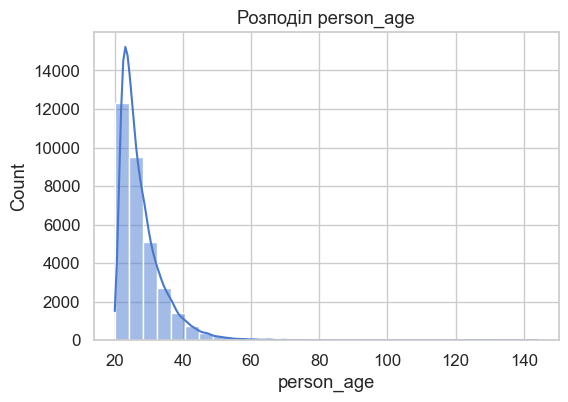

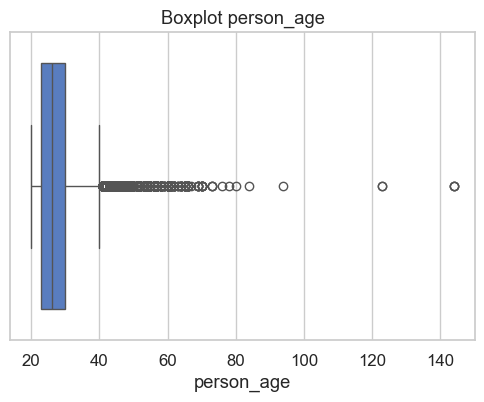

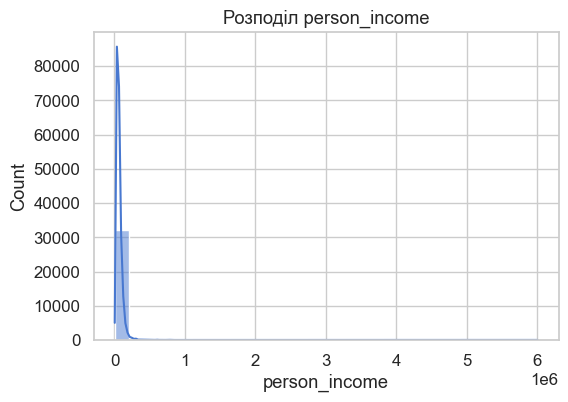

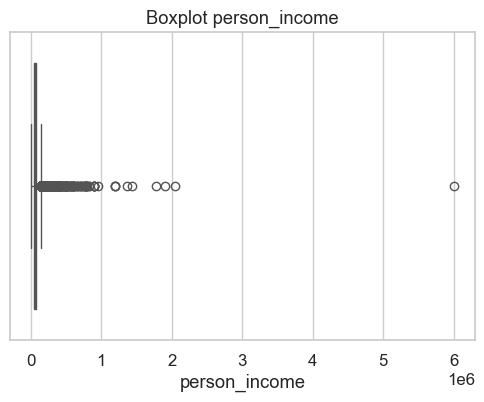

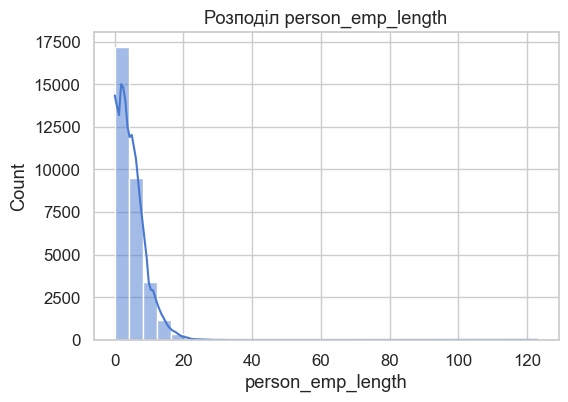

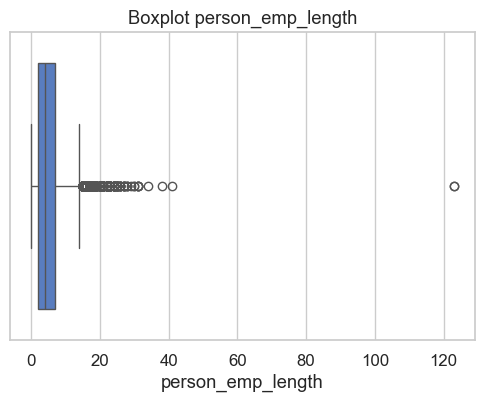

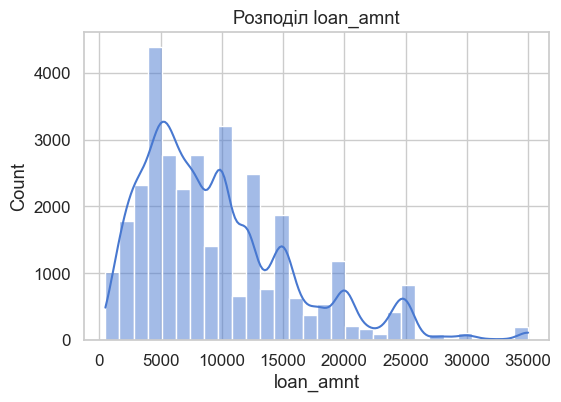

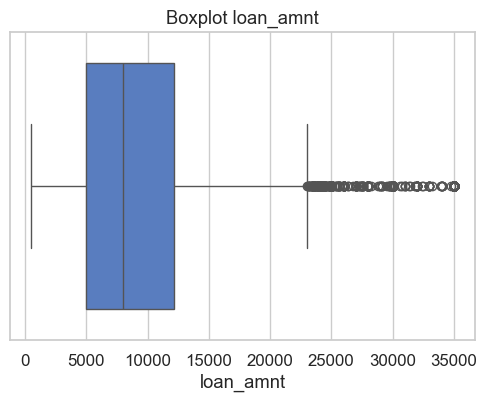

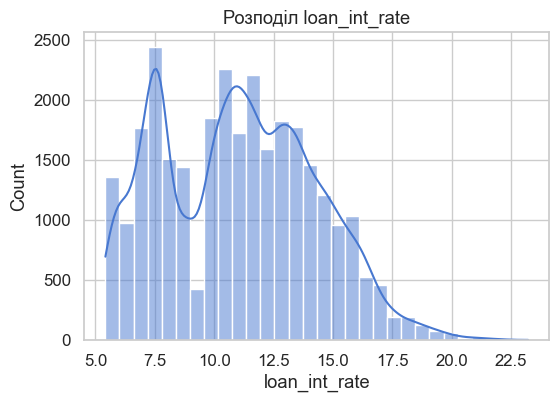

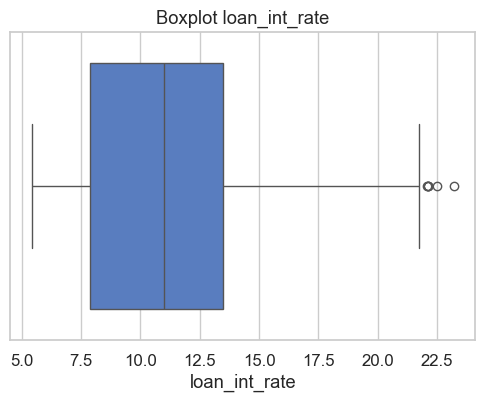

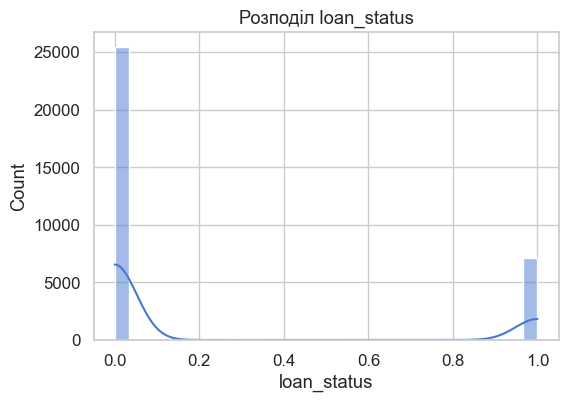

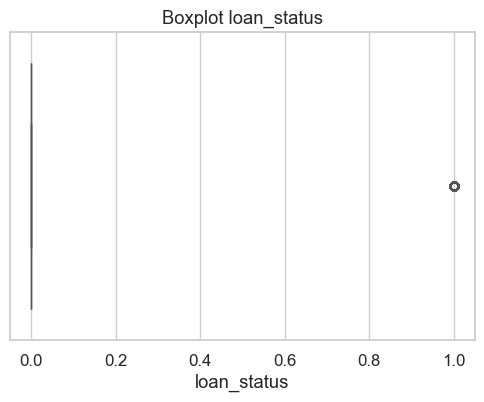

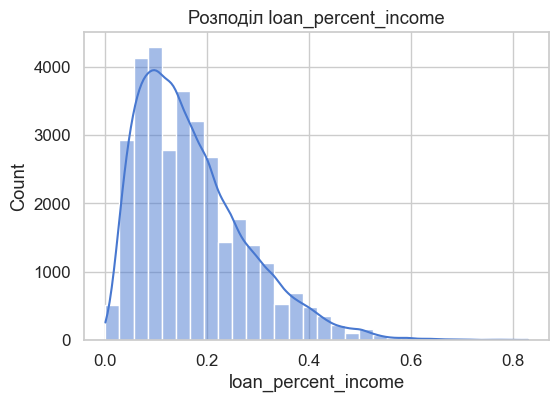

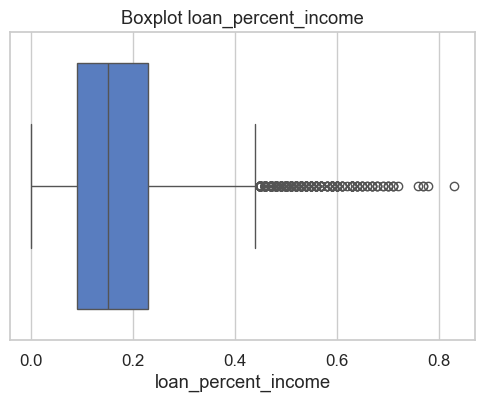

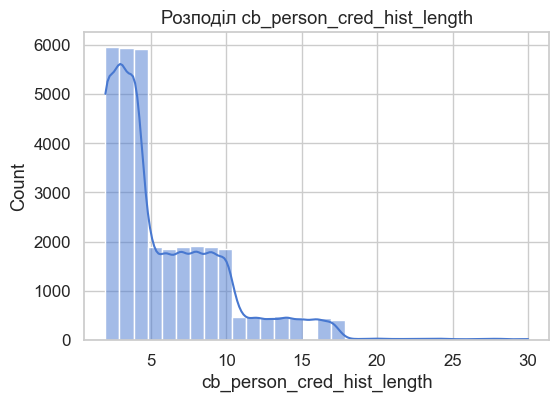

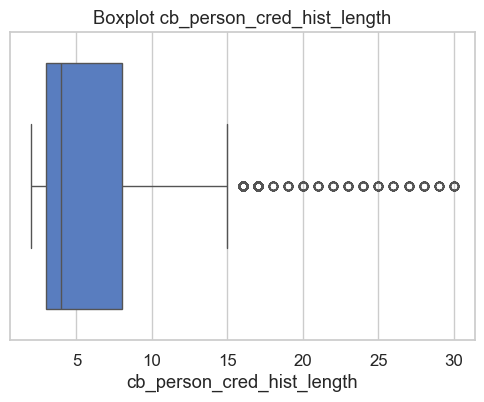

In [9]:
# Розподіл числових змінних
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Розподіл {col}")
    plt.show()
    
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()

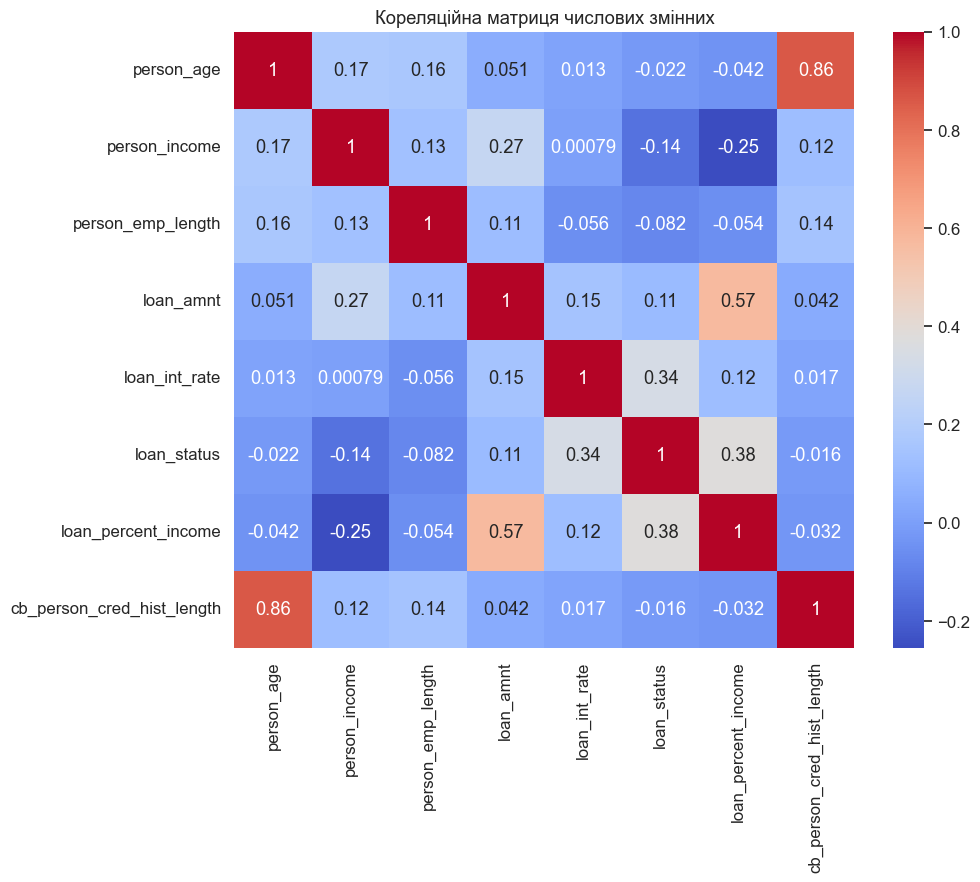

In [10]:
# Кореляції
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця числових змінних")
plt.show()

# 4️⃣ Категоріальні колонки


Категоріальні колонки: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


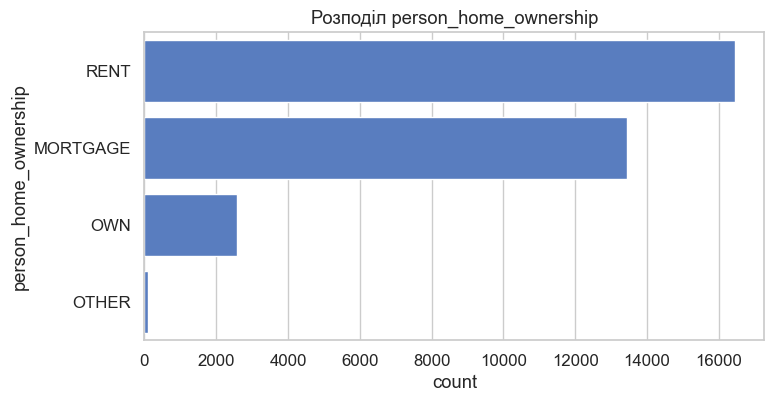

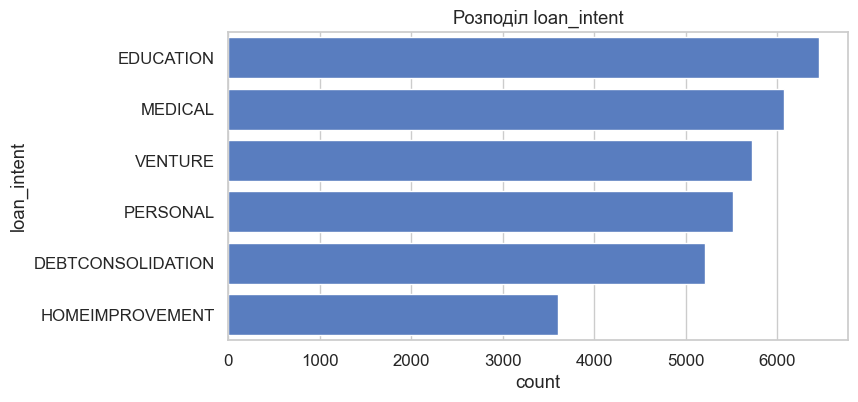

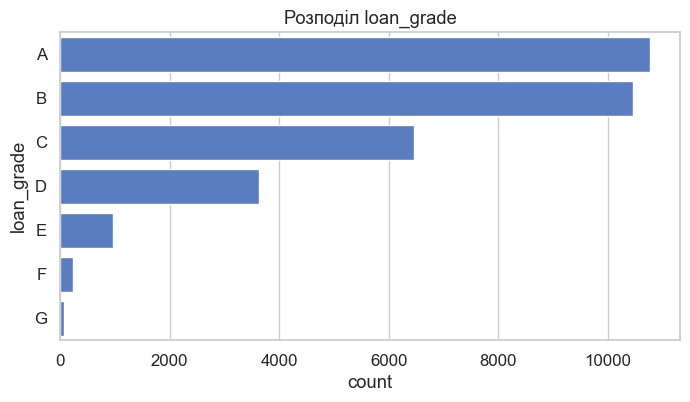

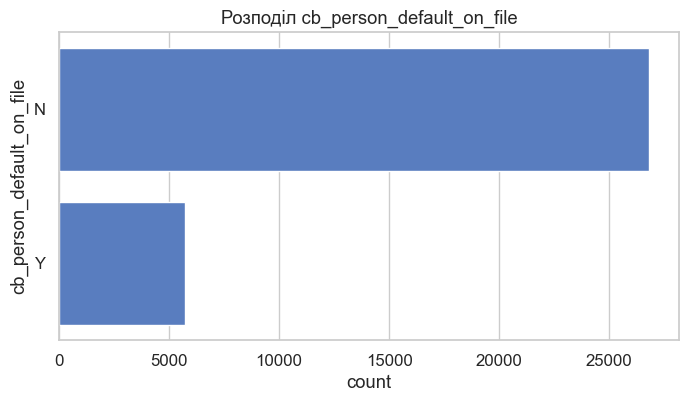

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nКатегоріальні колонки:", cat_cols)

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Розподіл {col}")
    plt.show()

# 5️⃣ Аналіз Loan Status

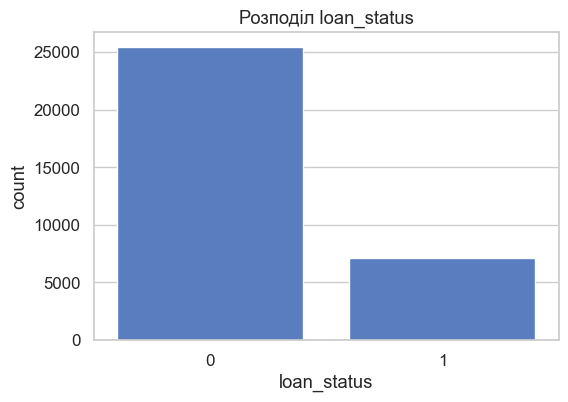

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title("Розподіл loan_status")
plt.show()

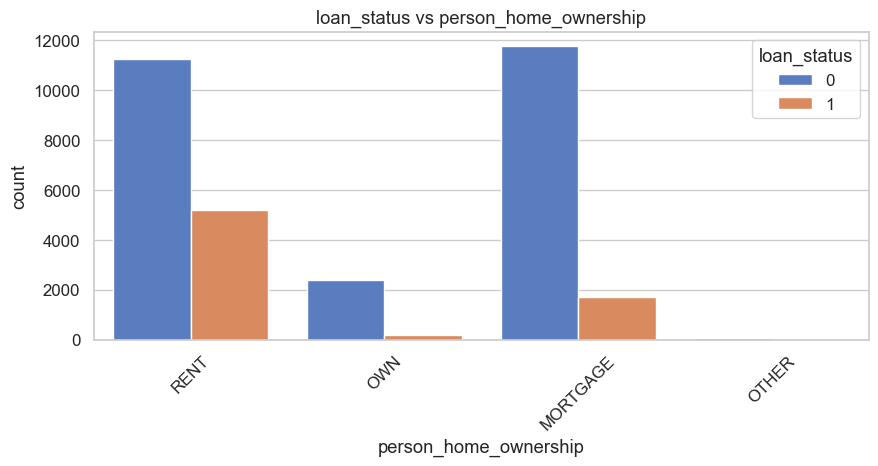

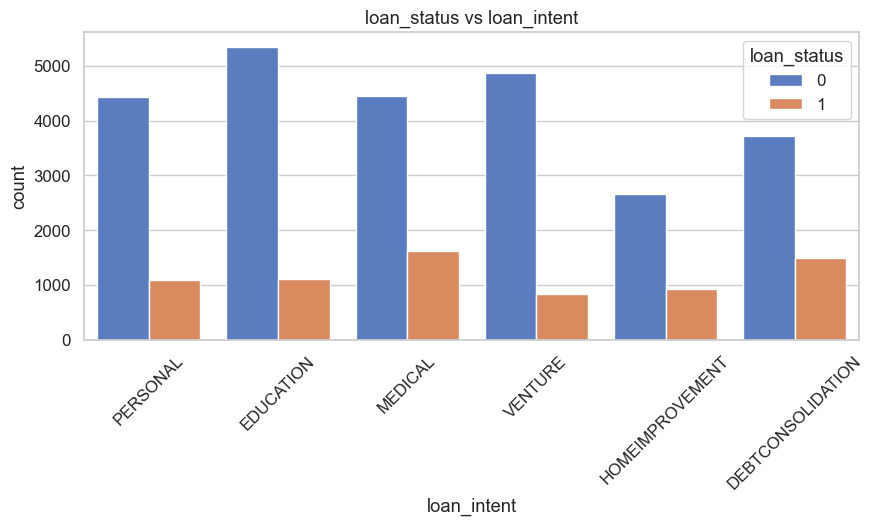

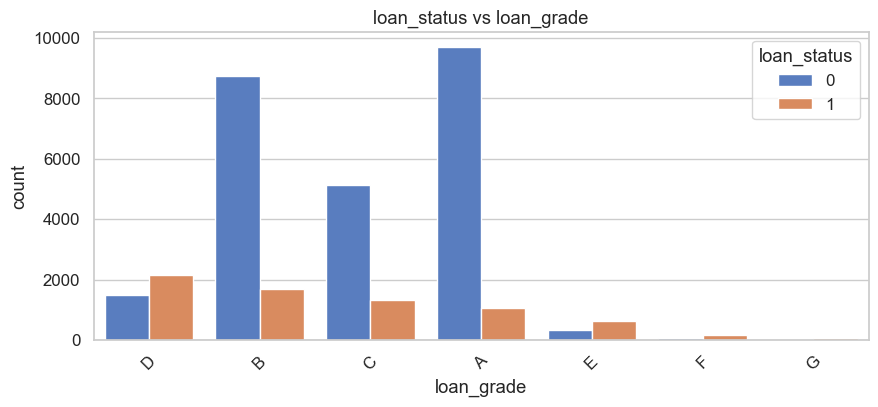

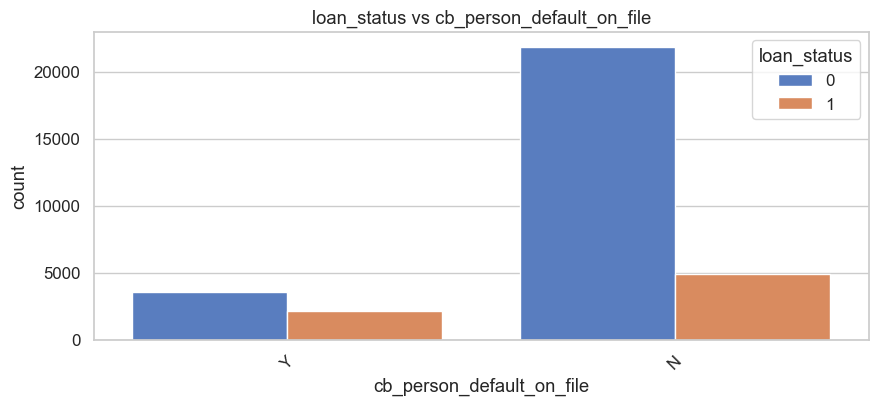

In [13]:
# Вплив категоріальних змінних на loan_status
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f"loan_status vs {col}")
    plt.xticks(rotation=45)
    plt.show()

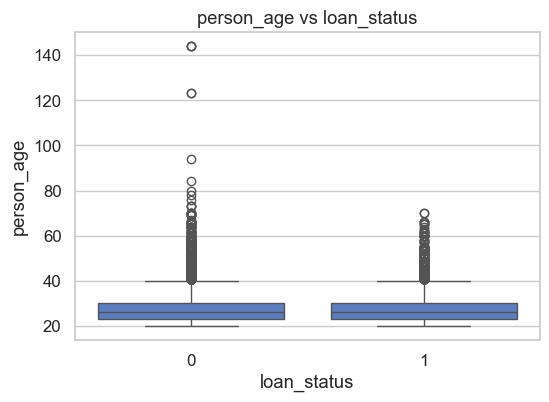

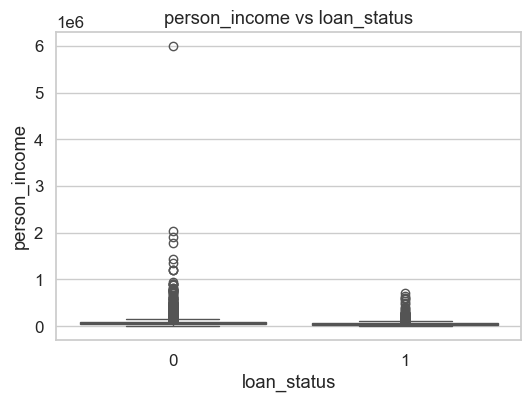

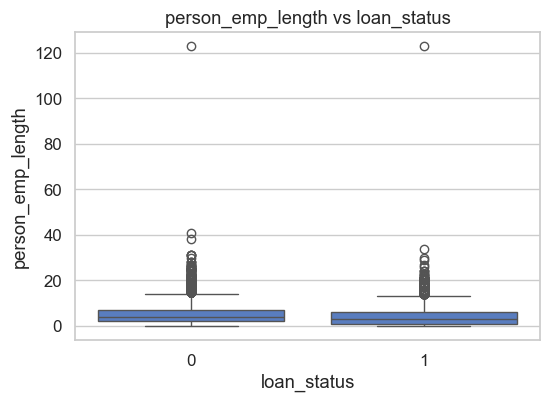

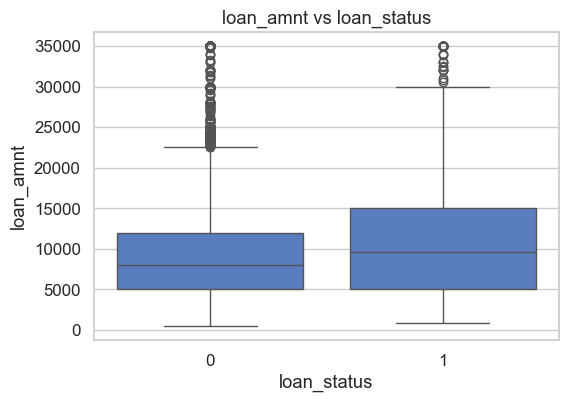

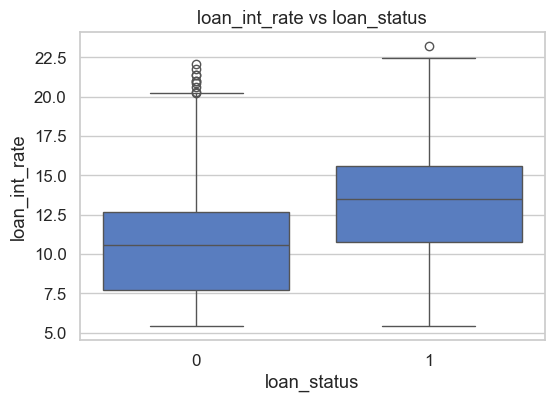

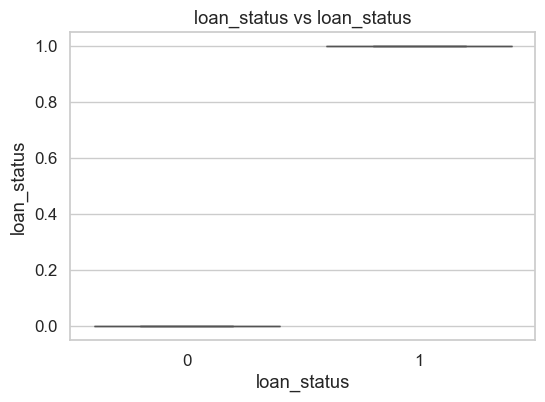

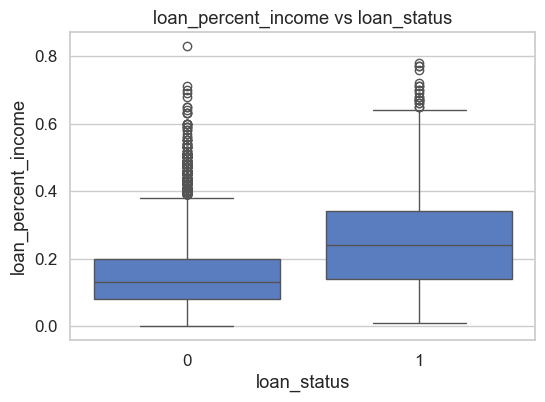

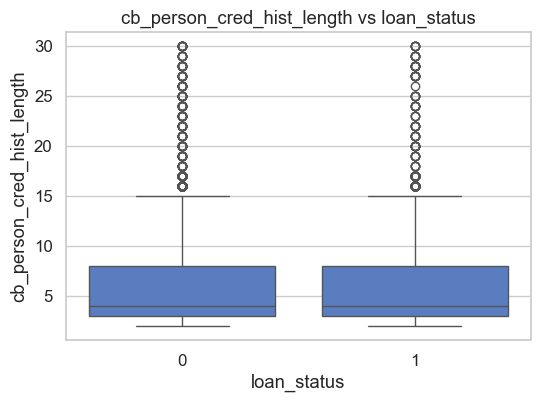

In [14]:
# Вплив числових змінних на loan_status
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f"{col} vs loan_status")
    plt.show()

# 6️⃣ loan_percent_income (0-1)

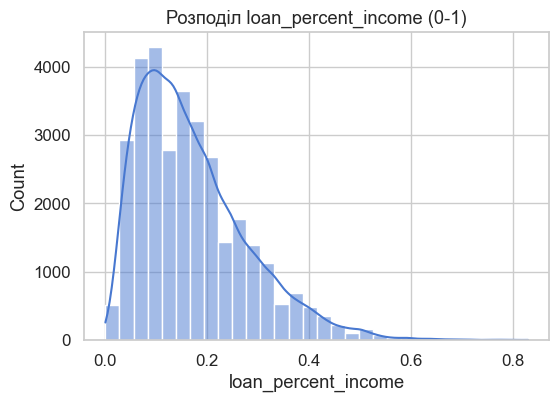

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df['loan_percent_income'], bins=30, kde=True)
plt.title("Розподіл loan_percent_income (0-1)")
plt.show()

# 7️⃣ Пропуски та аномалії для person_emp_length і loan_int_rate

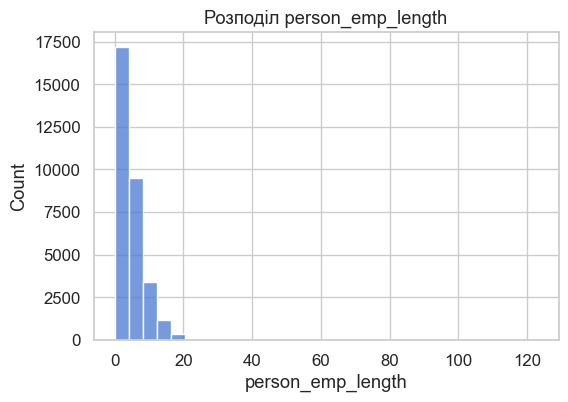

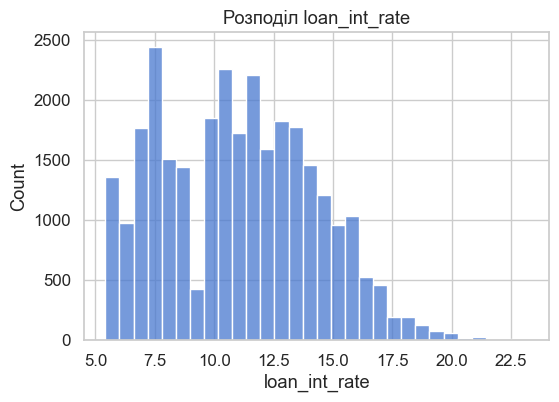

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['person_emp_length'].dropna(), bins=30)
plt.title("Розподіл person_emp_length")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['loan_int_rate'].dropna(), bins=30)
plt.title("Розподіл loan_int_rate")
plt.show()

# 8️⃣ Аналіз взаємозв’язків

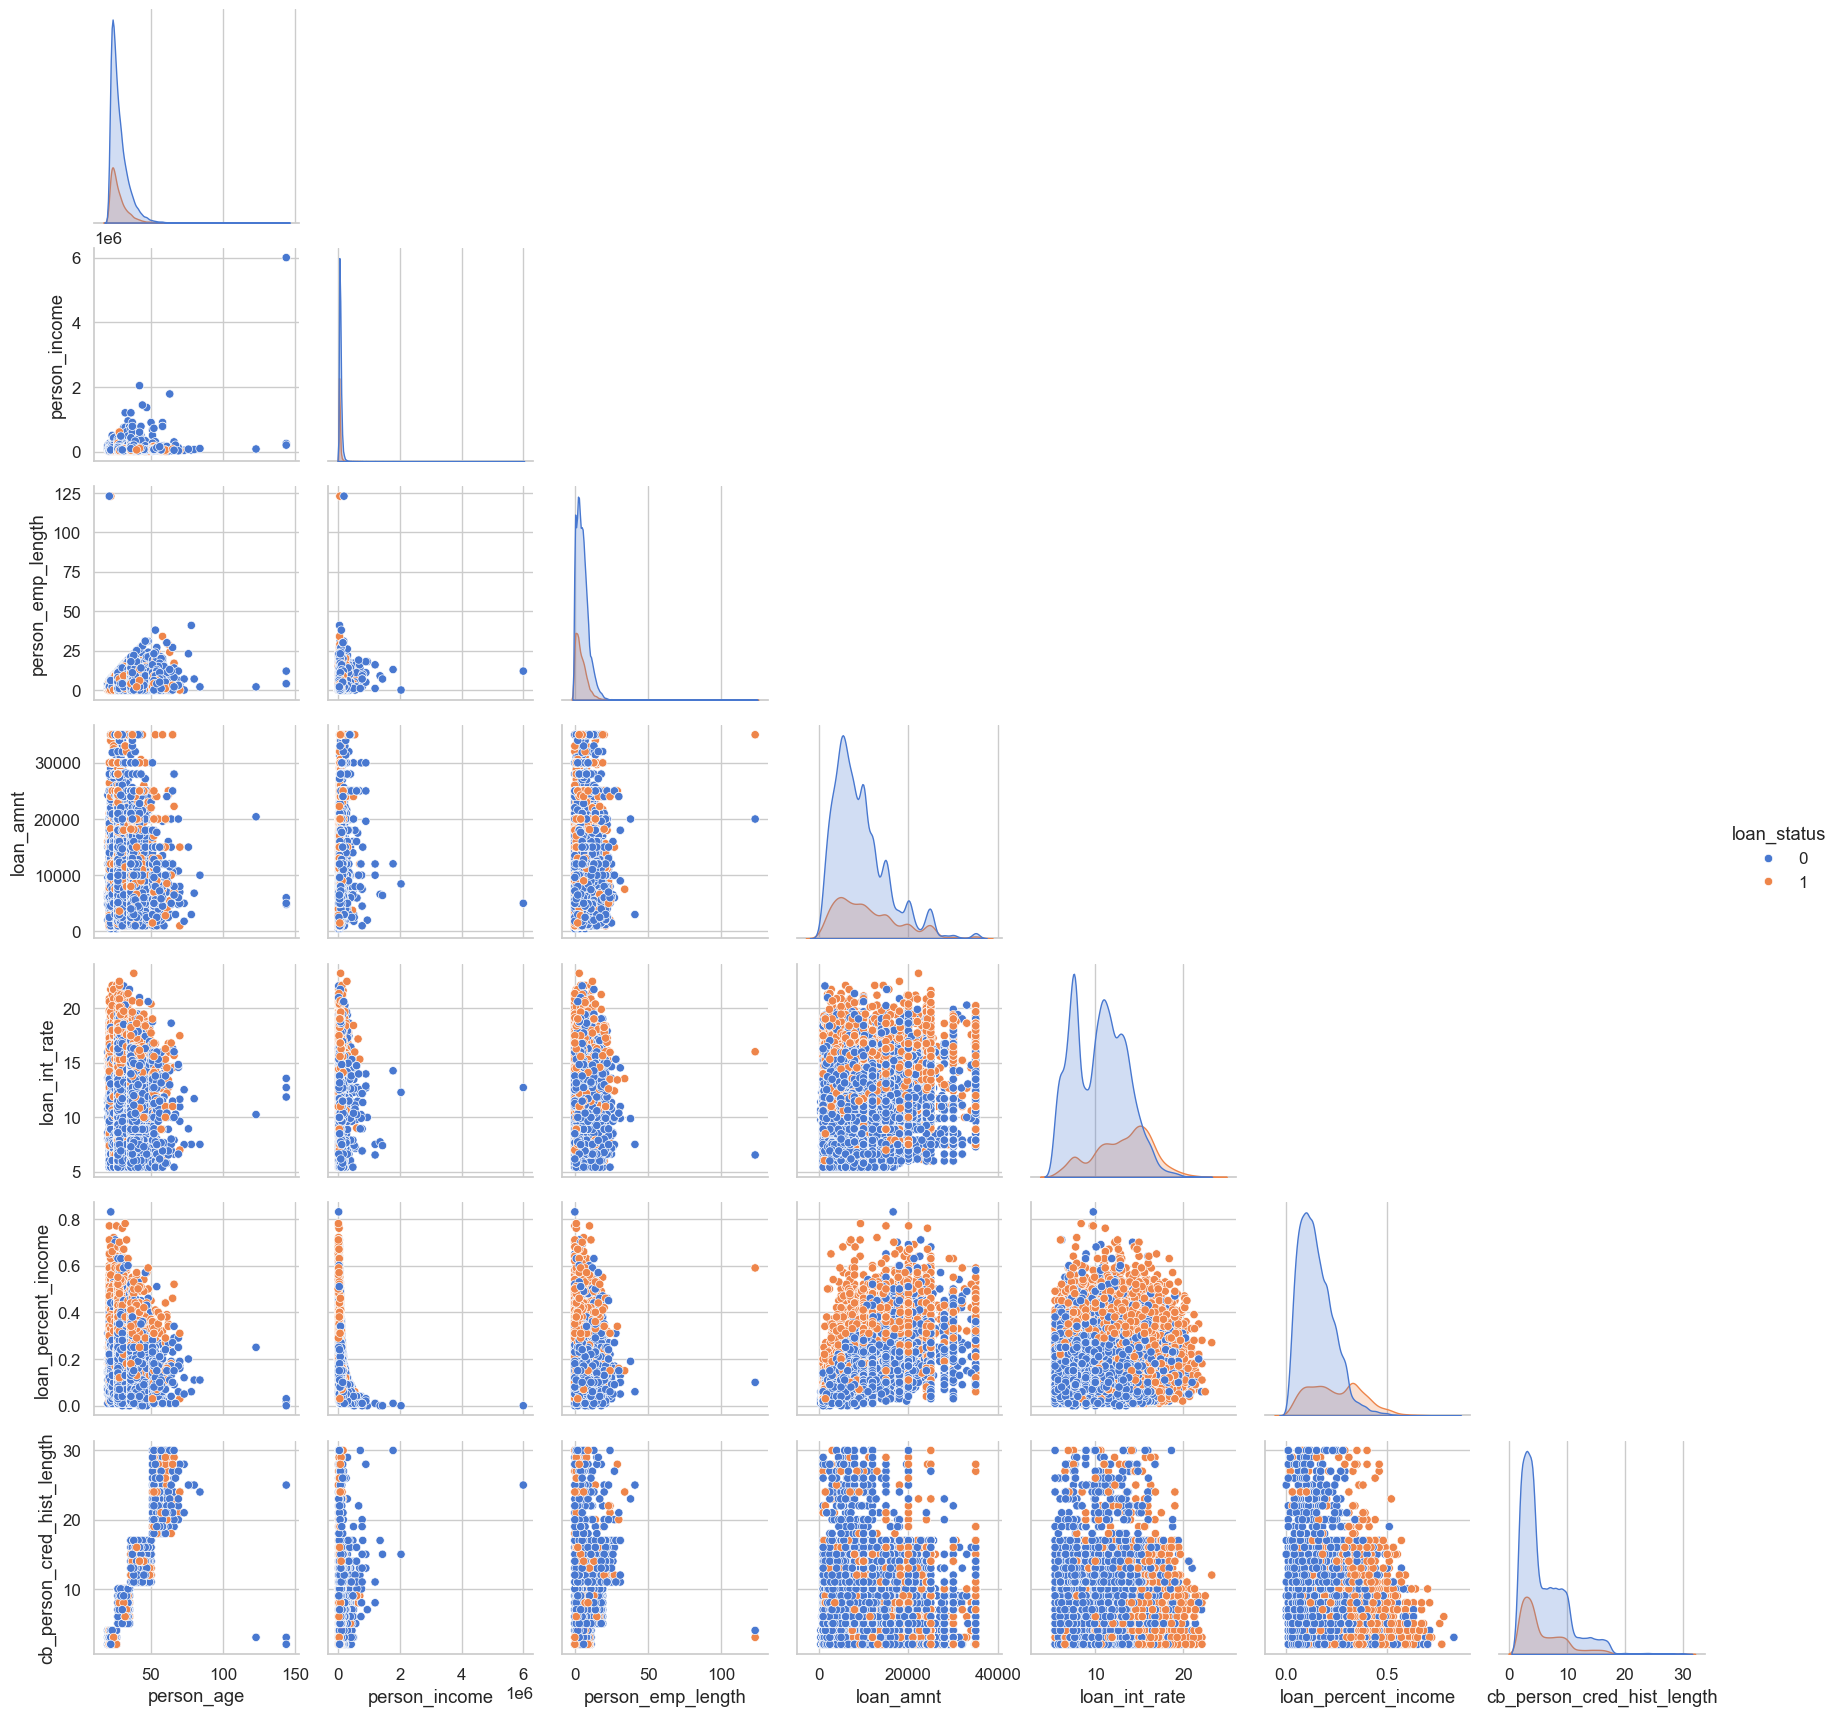

In [17]:
# Вибираємо лише числові колонки, окрім loan_status
num_cols_pairplot = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols_pairplot.remove('loan_status')  # видаляємо target

# Беремо піддатасет без пропусків
df_pairplot = df[num_cols_pairplot + ['loan_status']].dropna()

# Pairplot
sns.pairplot(df_pairplot, hue='loan_status', diag_kind='kde', corner=True)
plt.show()


# 9 Взаємозв’язки числових змінних з категоріями


Середні значення person_age по person_home_ownership та loan_status:
loan_status                    0          1
person_home_ownership                      
MORTGAGE               28.005955  27.805325
OTHER                  26.878378  26.636364
OWN                    27.705981  27.606218
RENT                   27.627066  27.367488


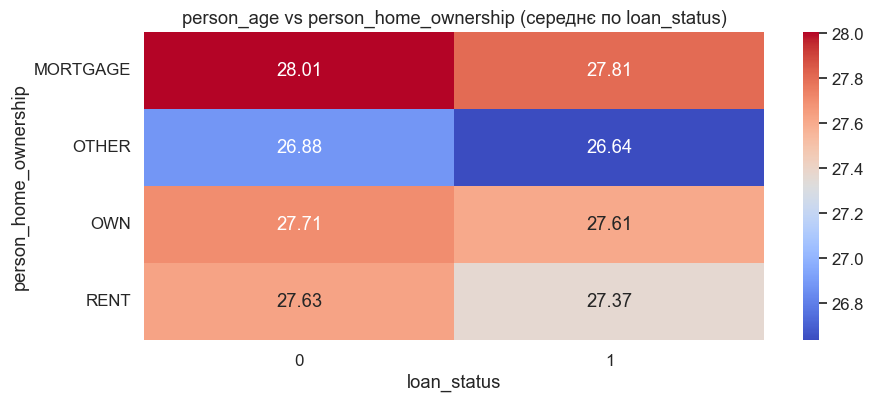


Середні значення person_age по loan_intent та loan_status:
loan_status                0          1
loan_intent                            
DEBTCONSOLIDATION  27.565019  27.709396
EDUCATION          26.470797  27.152115
HOMEIMPROVEMENT    29.559309  27.671626
MEDICAL            28.079326  27.774830
PERSONAL           28.418720  27.361566
VENTURE            27.695402  26.838253


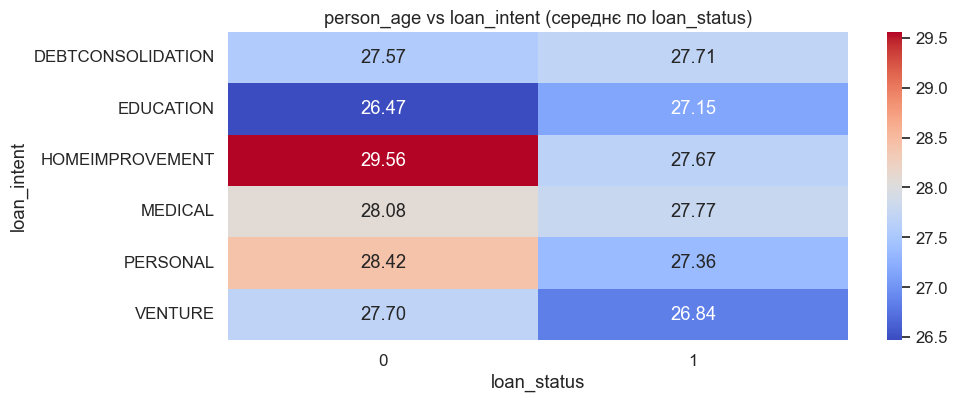


Середні значення person_age по loan_grade та loan_status:
loan_status          0          1
loan_grade                       
A            27.720940  27.150047
B            27.763314  27.288654
C            27.929478  27.307692
D            28.107744  27.717889
E            27.991254  27.800322
F            28.971831  28.094118
G            29.000000  28.428571


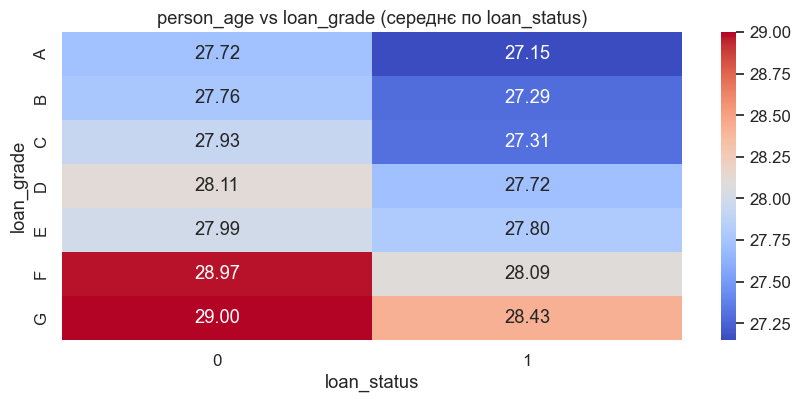


Середні значення person_age по cb_person_default_on_file та loan_status:
loan_status                        0          1
cb_person_default_on_file                      
N                          27.793196  27.381888
Y                          27.892527  27.685543


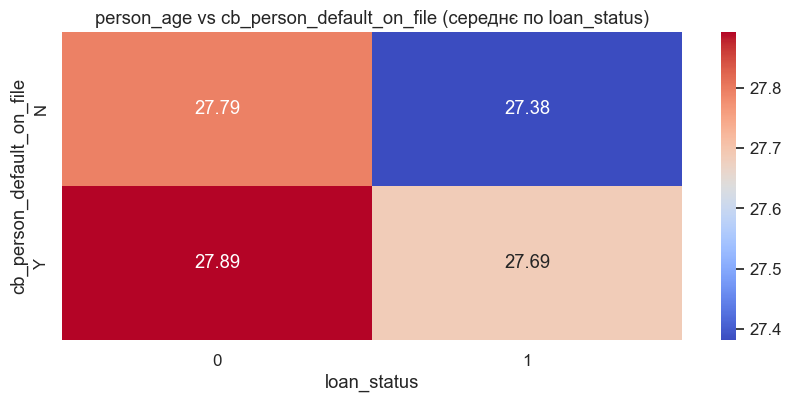


Середні значення person_income по person_home_ownership та loan_status:
loan_status                       0             1
person_home_ownership                            
MORTGAGE               82849.740003  69146.260355
OTHER                  88585.608108  49035.151515
OWN                    60394.305730  26126.274611
RENT                   60318.601208  43464.450116


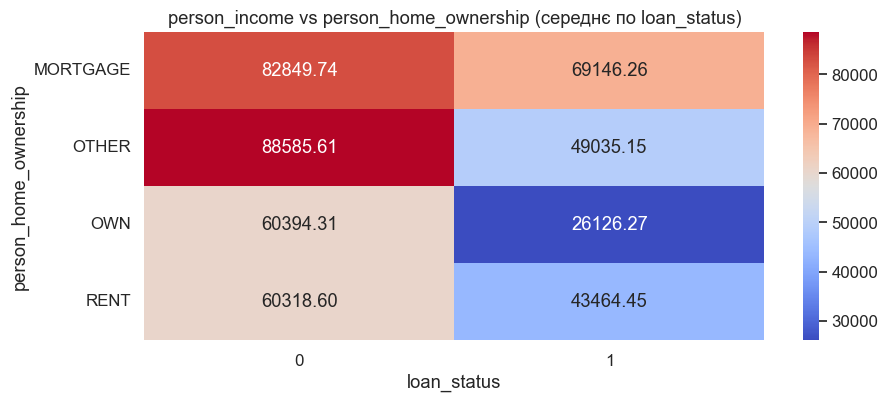


Середні значення person_income по loan_intent та loan_status:
loan_status                   0             1
loan_intent                                  
DEBTCONSOLIDATION  71588.914293  53686.085906
EDUCATION          67745.394796  46776.364536
HOMEIMPROVEMENT    82085.335210  49384.174283
MEDICAL            65422.364494  50497.152375
PERSONAL           73055.192177  46953.377960
VENTURE            70263.073481  44088.696576


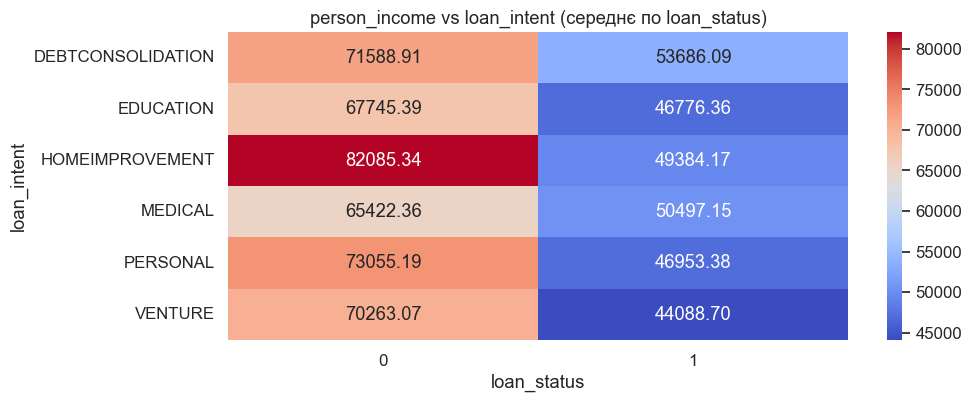


Середні значення person_income по loan_grade та loan_status:
loan_status             0             1
loan_grade                             
A            69779.146538  37529.106244
B            70634.650857  44339.346855
C            70284.075601  44422.465273
D            75692.118519  55320.744979
E            86517.043732  62232.413849
F            91621.746479  70905.647059
G            42000.000000  77325.253968


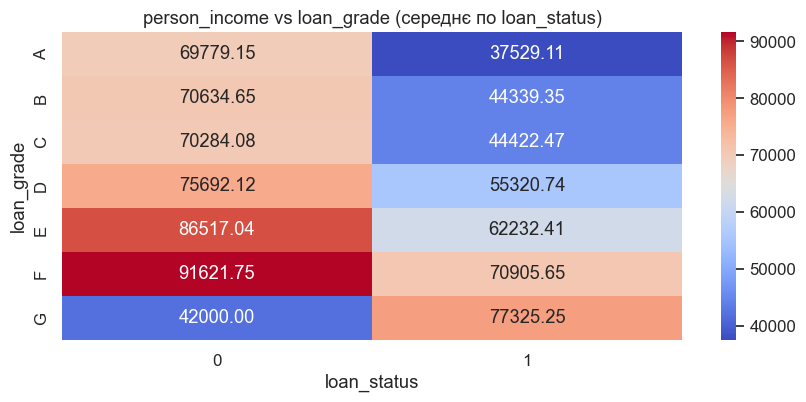


Середні значення person_income по cb_person_default_on_file та loan_status:
loan_status                           0             1
cb_person_default_on_file                            
N                          70576.136164  46666.978728
Y                          72203.224181  54713.134899


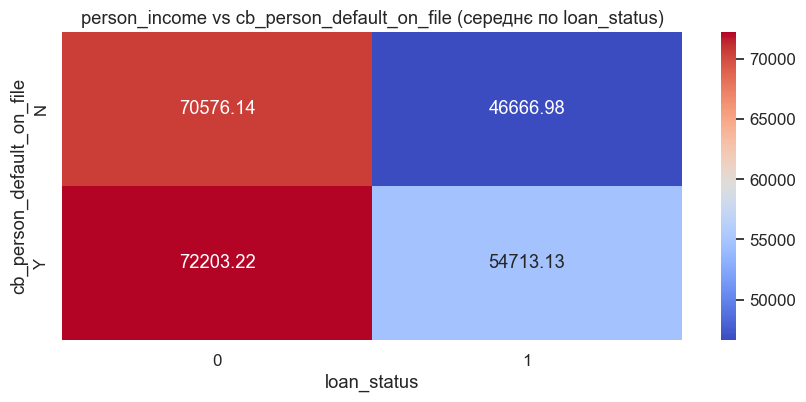


Середні значення person_emp_length по person_home_ownership та loan_status:
loan_status                   0         1
person_home_ownership                    
MORTGAGE               5.902120  5.755828
OTHER                  3.945946  3.090909
OWN                    5.316986  3.161677
RENT                   3.939440  3.649119


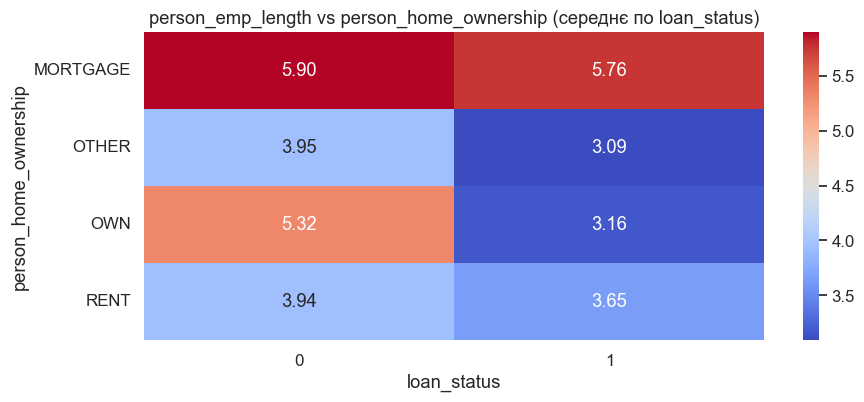


Середні значення person_emp_length по loan_intent та loan_status:
loan_status               0         1
loan_intent                          
DEBTCONSOLIDATION  4.833471  4.590814
EDUCATION          4.593224  3.830206
HOMEIMPROVEMENT    5.593188  3.797101
MEDICAL            4.817636  4.627476
PERSONAL           5.126330  3.904489
VENTURE            5.136229  3.472973


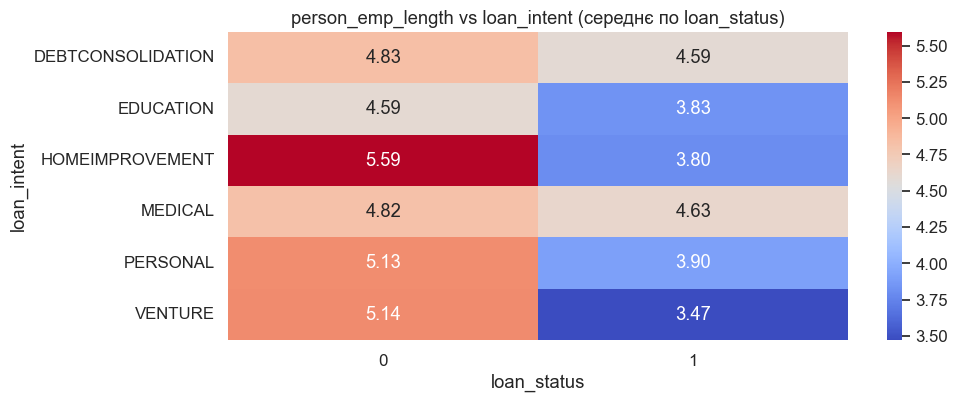


Середні значення person_emp_length по loan_grade та loan_status:
loan_status         0         1
loan_grade                     
A            5.172814  4.431887
B            4.839794  4.305795
C            4.532354  4.127046
D            5.722374  3.990431
E            5.633431  3.675941
F            5.800000  3.602410
G            4.000000  6.158730


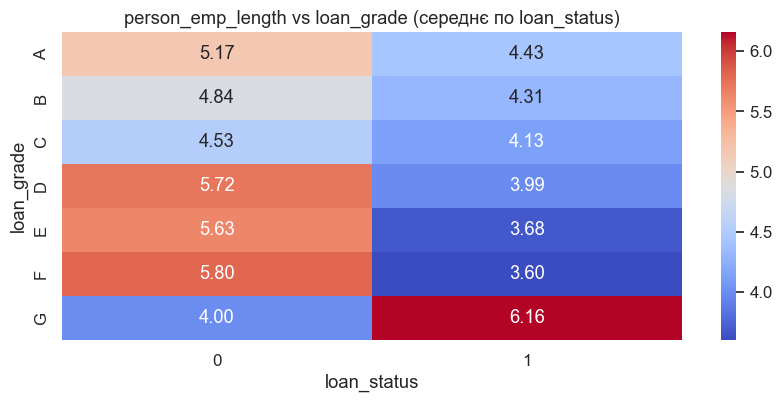


Середні значення person_emp_length по cb_person_default_on_file та loan_status:
loan_status                       0         1
cb_person_default_on_file                    
N                          4.994097  4.158777
Y                          4.814741  4.090307


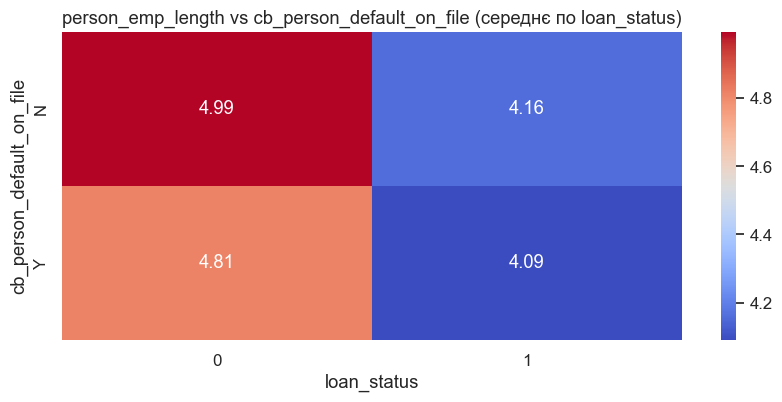


Середні значення loan_amnt по person_home_ownership та loan_status:
loan_status                       0             1
person_home_ownership                            
MORTGAGE               10434.209631  11549.911243
OTHER                  10039.189189  13396.212121
OWN                     9215.892932   6726.295337
RENT                    7986.860227  10759.972072


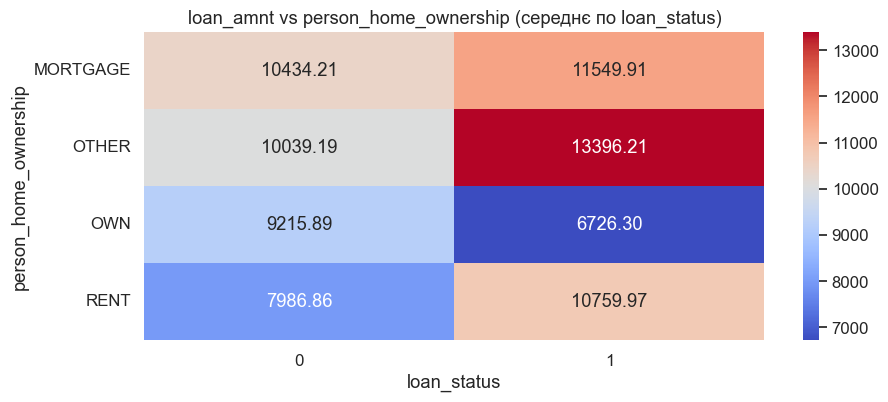


Середні значення loan_amnt по loan_intent та loan_status:
loan_status                   0             1
loan_intent                                  
DEBTCONSOLIDATION   8986.270822  11115.201342
EDUCATION           9179.197866  10941.899190
HOMEIMPROVEMENT    10526.951952   9889.346440
MEDICAL             8554.814607  11194.324491
PERSONAL            9340.718969  10512.568306
VENTURE             9317.944376  11112.868949


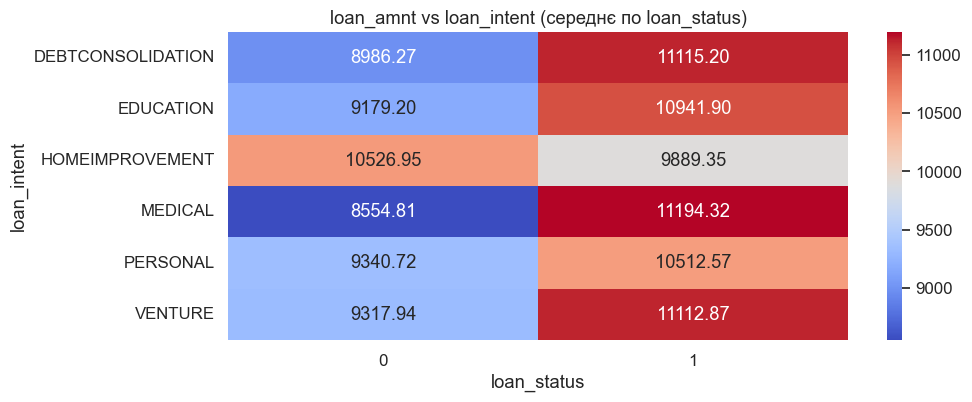


Середні значення loan_amnt по loan_grade та loan_status:
loan_status             0             1
loan_grade                             
A             8432.113046   9508.410997
B             9753.414286  11240.696649
C             8971.190662  10141.598208
D            11137.542088  10649.276039
E            13480.903790  12603.743961
F            14788.732394  14687.500000
G             1600.000000  17443.253968


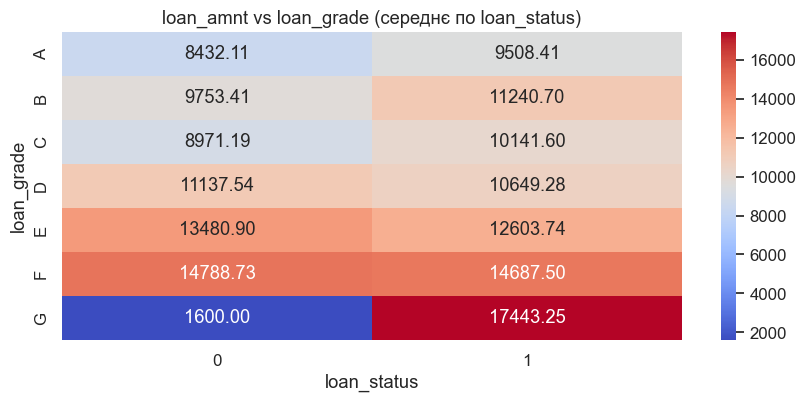


Середні значення loan_amnt по cb_person_default_on_file та loan_status:
loan_status                          0             1
cb_person_default_on_file                           
N                          9170.207763  10827.603323
Y                          9649.699132  10902.543738


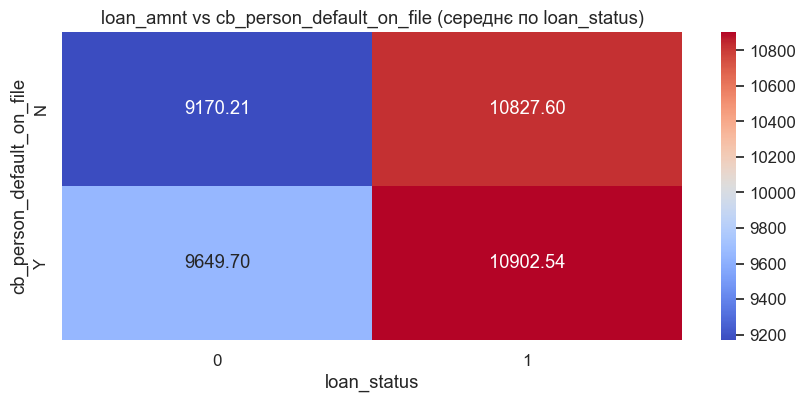


Середні значення loan_int_rate по person_home_ownership та loan_status:
loan_status                    0          1
person_home_ownership                      
MORTGAGE               10.059928  13.431663
OTHER                  11.413582  13.561852
OWN                    10.754801  12.237396
RENT                   10.752531  12.965862


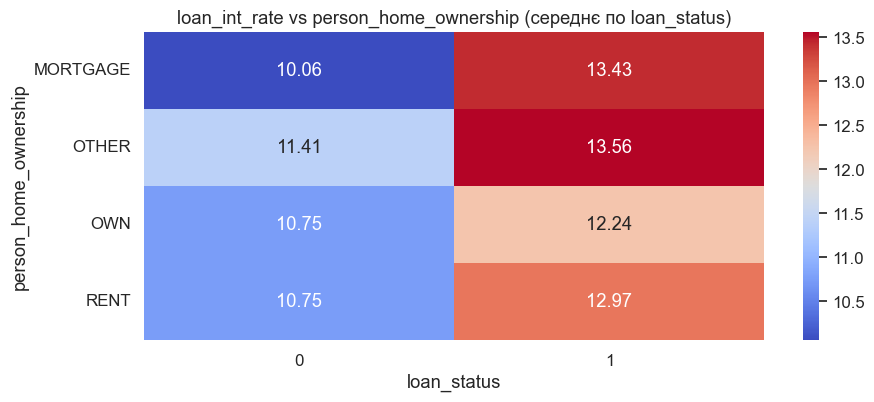


Середні значення loan_int_rate по loan_intent та loan_status:
loan_status                0          1
loan_intent                            
DEBTCONSOLIDATION  10.014987  13.398217
EDUCATION          10.626655  12.500435
HOMEIMPROVEMENT    10.597985  12.897428
MEDICAL            10.194221  13.403209
PERSONAL           10.590984  12.612653
VENTURE            10.535900  13.320917


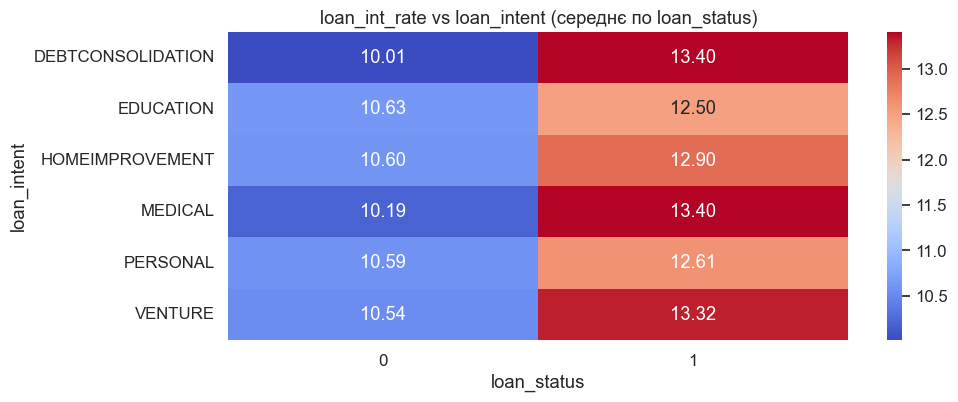


Середні значення loan_int_rate по loan_grade та loan_status:
loan_status          0          1
loan_grade                       
A             7.303224   7.547595
B            10.987726  11.035864
C            13.464246  13.460852
D            15.391206  15.341172
E            16.992935  17.018424
F            18.793750  18.530400
G            19.160000  20.270345


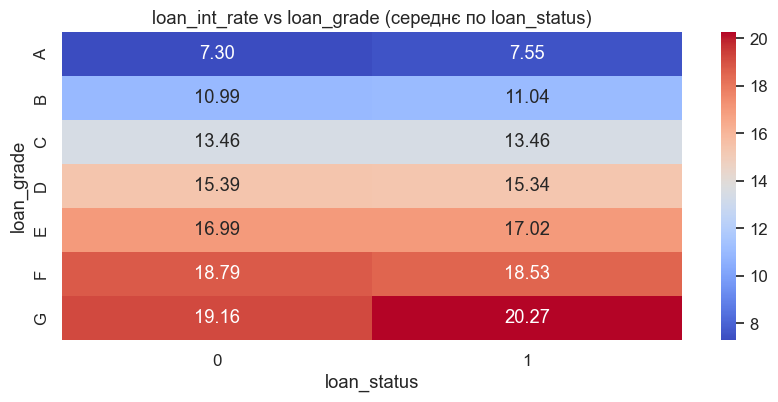


Середні значення loan_int_rate по cb_person_default_on_file та loan_status:
loan_status                        0          1
cb_person_default_on_file                      
N                           9.837381  12.118278
Y                          14.098849  15.190242


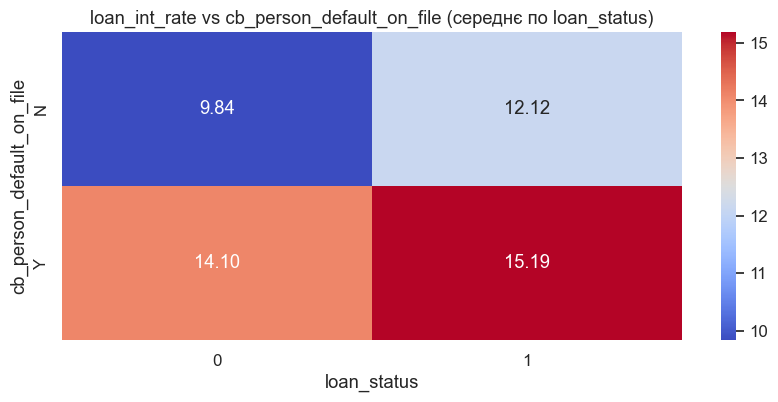


Середні значення loan_percent_income по person_home_ownership та loan_status:
loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


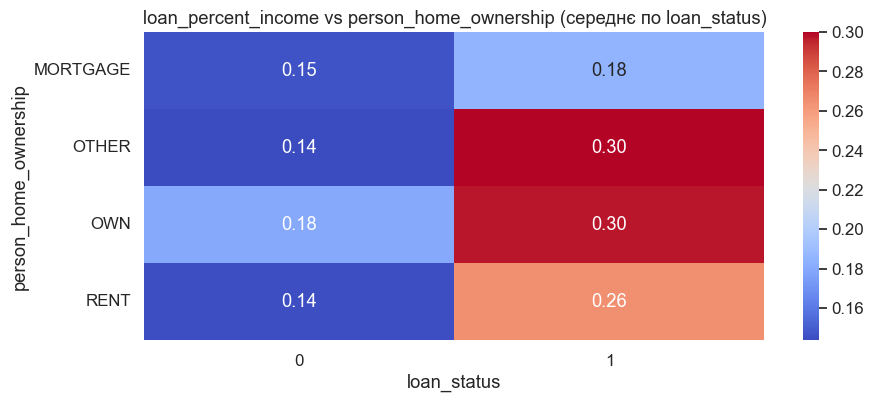


Середні значення loan_percent_income по loan_intent та loan_status:
loan_status               0         1
loan_intent                          
DEBTCONSOLIDATION  0.144245  0.237215
EDUCATION          0.151520  0.259928
HOMEIMPROVEMENT    0.146137  0.220372
MEDICAL            0.148169  0.241333
PERSONAL           0.148571  0.252450
VENTURE            0.151564  0.279693


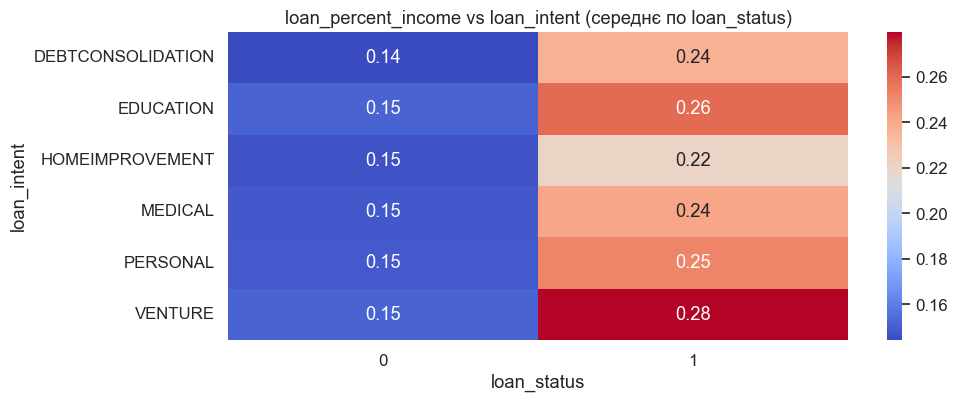


Середні значення loan_percent_income по loan_grade та loan_status:
loan_status         0         1
loan_grade                     
A            0.139623  0.280839
B            0.155128  0.278995
C            0.148345  0.253189
D            0.165475  0.208748
E            0.174636  0.223317
F            0.185775  0.228118
G            0.040000  0.247143


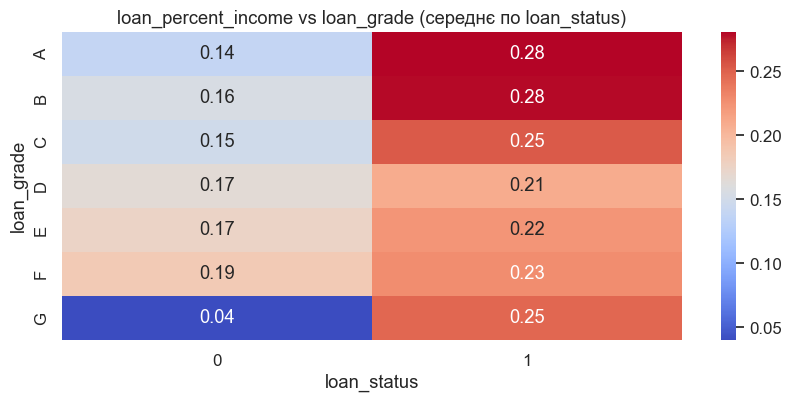


Середні значення loan_percent_income по cb_person_default_on_file та loan_status:
loan_status                       0         1
cb_person_default_on_file                    
N                          0.148364  0.257453
Y                          0.151506  0.222882


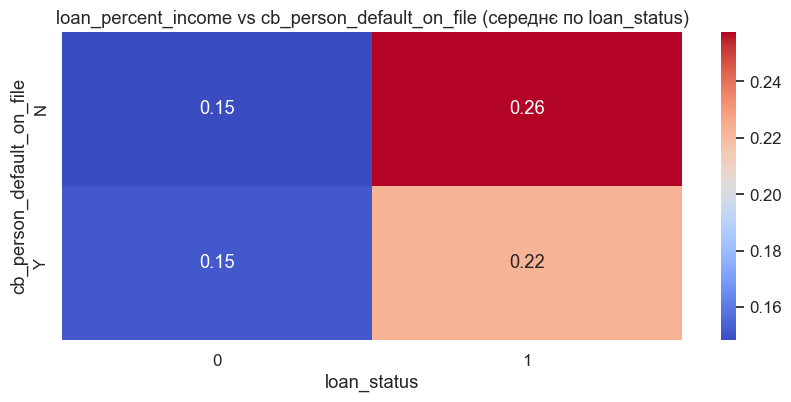


Середні значення cb_person_cred_hist_length по person_home_ownership та loan_status:
loan_status                   0         1
person_home_ownership                    
MORTGAGE               5.942403  5.784024
OTHER                  5.310811  5.363636
OWN                    5.889168  5.611399
RENT                   5.720366  5.657550


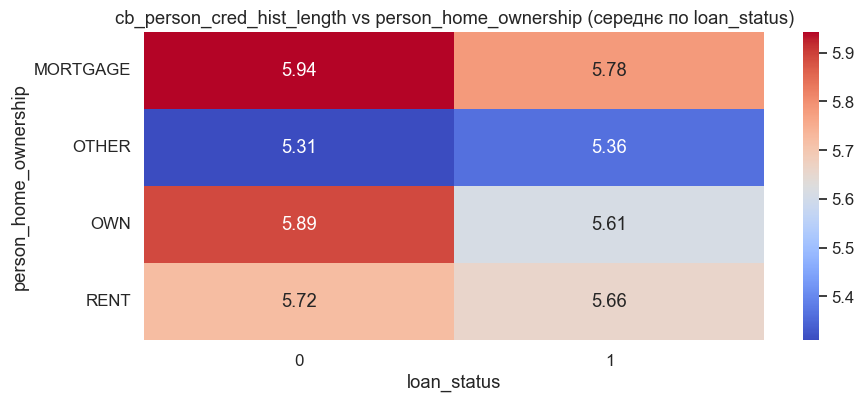


Середні значення cb_person_cred_hist_length по loan_intent та loan_status:
loan_status               0         1
loan_intent                          
DEBTCONSOLIDATION  5.692907  5.785235
EDUCATION          5.085548  5.522952
HOMEIMPROVEMENT    6.744369  5.738576
MEDICAL            5.984270  5.824800
PERSONAL           6.221795  5.724044
VENTURE            5.793514  5.343566


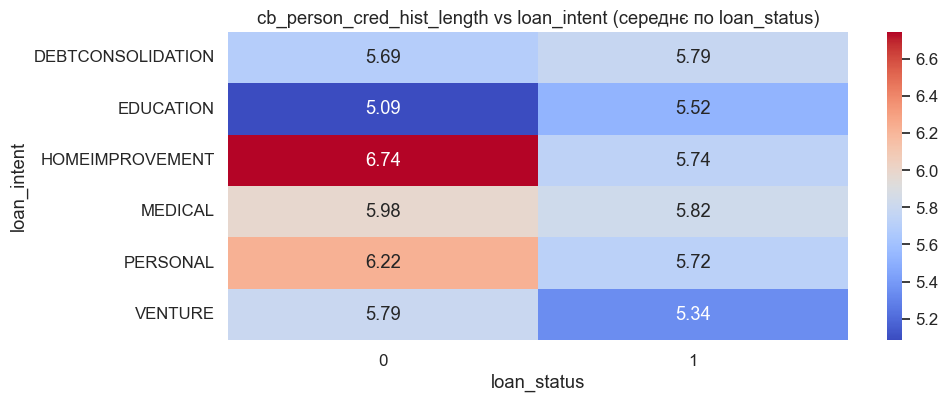


Середні значення cb_person_cred_hist_length по loan_grade та loan_status:
loan_status         0         1
loan_grade                     
A            5.774217  5.469711
B            5.814400  5.616108
C            5.920688  5.654220
D            6.063300  5.783746
E            5.842566  5.822866
F            6.577465  5.941176
G            6.000000  6.460317


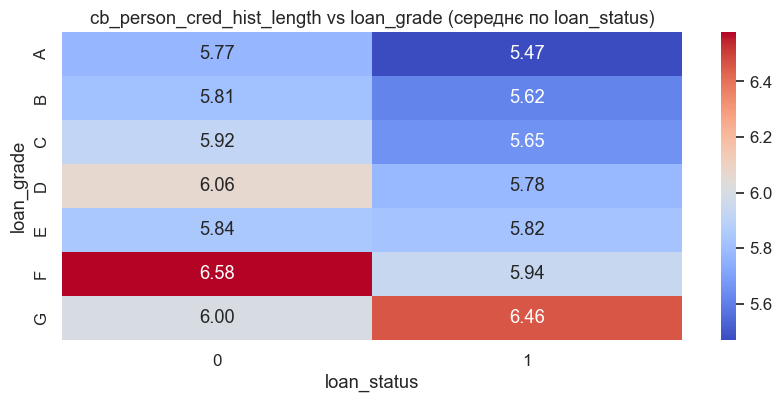


Середні значення cb_person_cred_hist_length по cb_person_default_on_file та loan_status:
loan_status                       0         1
cb_person_default_on_file                    
N                          5.830594  5.640600
Y                          5.879653  5.785912


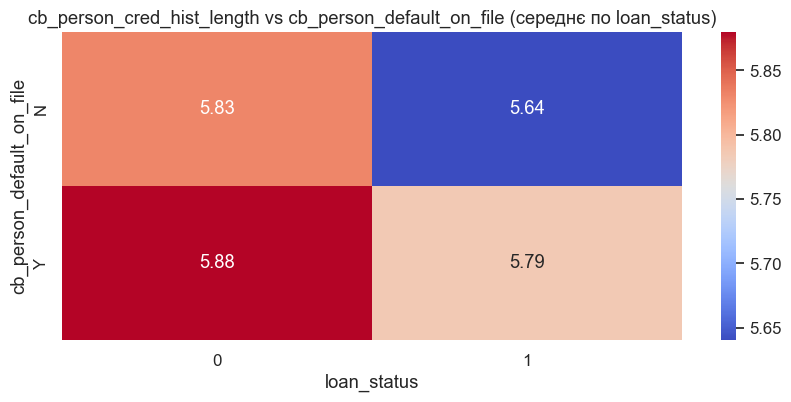

In [29]:
for col in num_cols:
    num_cols = ['person_age', 'person_income', 'person_emp_length',
            'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_cred_hist_length']  # без loan_status

    for cat in cat_cols:
        pivot = df.pivot_table(values=col, index=cat, columns='loan_status', aggfunc='mean')
        print(f"\nСередні значення {col} по {cat} та loan_status:")
        print(pivot)

        plt.figure(figsize=(10,4))
        sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title(f"{col} vs {cat} (середнє по loan_status)")
        plt.show()

# 10 Взаємозв’язки між категоріями


Взаємозв’язок person_home_ownership vs loan_intent (в відсотках):


loan_intent            DEBTCONSOLIDATION  EDUCATION  HOMEIMPROVEMENT  \
person_home_ownership                                                  
MORTGAGE                        0.171973   0.195403         0.129500   
OTHER                           0.158879   0.158879         0.112150   
OWN                             0.027864   0.204334         0.123065   
RENT                            0.170923   0.199501         0.093275   

loan_intent             MEDICAL  PERSONAL   VENTURE  
person_home_ownership                                
MORTGAGE               0.162898  0.174055  0.166171  
OTHER                  0.158879  0.168224  0.242991  
OWN                    0.167957  0.172601  0.304180  
RENT                   0.208561  0.165207  0.162532

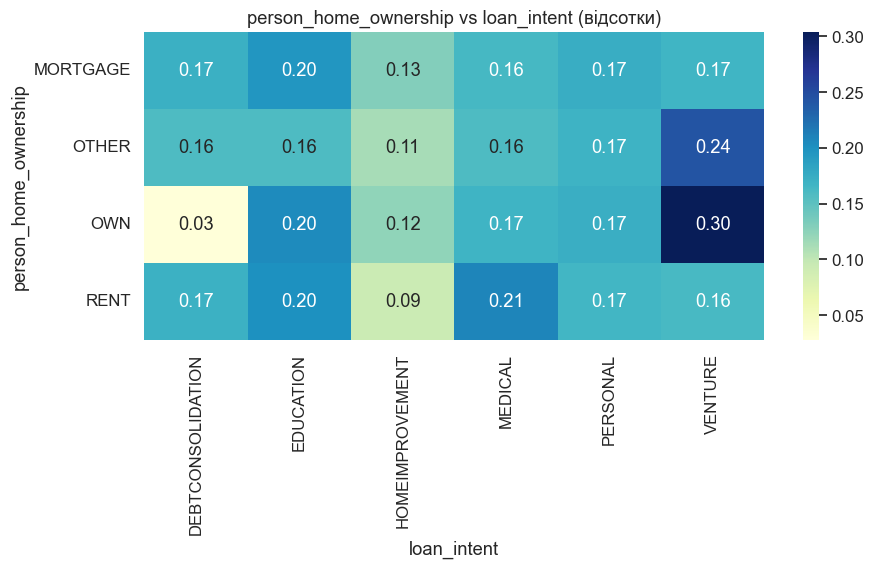


Взаємозв’язок person_home_ownership vs loan_grade (в відсотках):


loan_grade                    A         B         C         D         E  \
person_home_ownership                                                     
MORTGAGE               0.405980  0.301473  0.167733  0.090077  0.025216   
OTHER                  0.242991  0.317757  0.158879  0.186916  0.074766   
OWN                    0.358359  0.311146  0.191563  0.109133  0.022059   
RENT                   0.265536  0.338076  0.224431  0.128481  0.034051   

loan_grade                    F         G  
person_home_ownership                      
MORTGAGE               0.007215  0.002306  
OTHER                  0.018692  0.000000  
OWN                    0.005805  0.001935  
RENT                   0.007722  0.001703

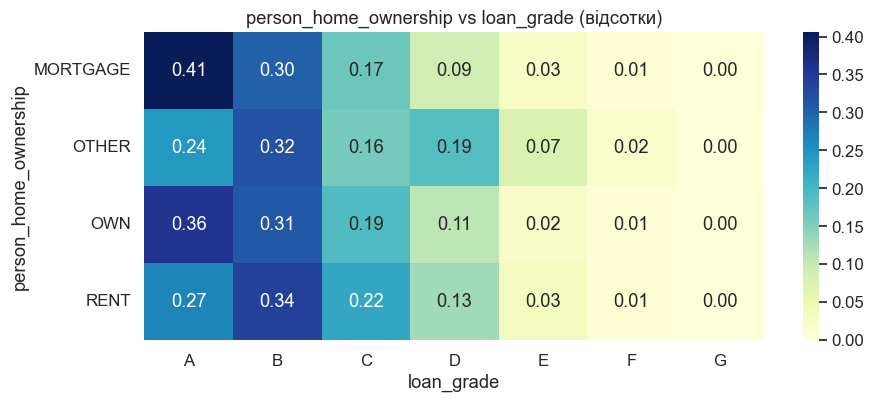


Взаємозв’язок person_home_ownership vs cb_person_default_on_file (в відсотках):


cb_person_default_on_file         N         Y
person_home_ownership                        
MORTGAGE                   0.851681  0.148319
OTHER                      0.728972  0.271028
OWN                        0.828173  0.171827
RENT                       0.800681  0.199319

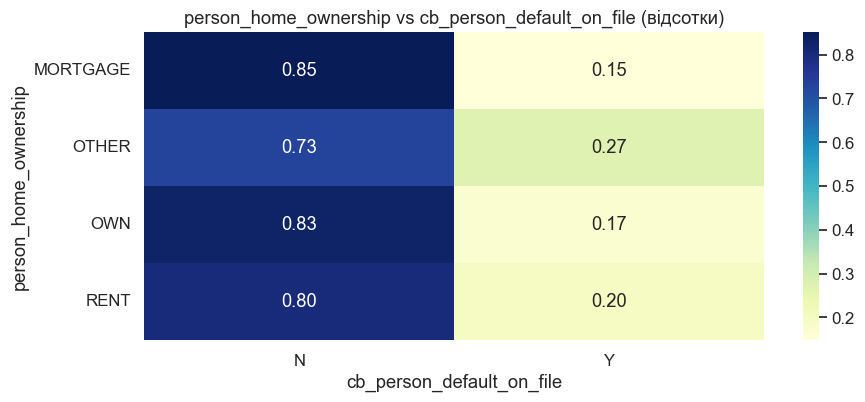


Взаємозв’язок loan_intent vs loan_grade (в відсотках):


loan_grade                A         B         C         D         E         F  \
loan_intent                                                                     
DEBTCONSOLIDATION  0.336339  0.310821  0.199923  0.115119  0.027629  0.008250   
EDUCATION          0.336898  0.313962  0.210135  0.101813  0.028669  0.007128   
HOMEIMPROVEMENT    0.312344  0.309293  0.192233  0.135090  0.039667  0.008877   
MEDICAL            0.322682  0.330423  0.200461  0.108384  0.027508  0.008565   
PERSONAL           0.331824  0.328383  0.189458  0.116464  0.026626  0.005434   
VENTURE            0.337996  0.327155  0.193041  0.101591  0.031124  0.006645   

loan_grade                G  
loan_intent                  
DEBTCONSOLIDATION  0.001919  
EDUCATION          0.001395  
HOMEIMPROVEMENT    0.002497  
MEDICAL            0.001977  
PERSONAL           0.001811  
VENTURE            0.002448

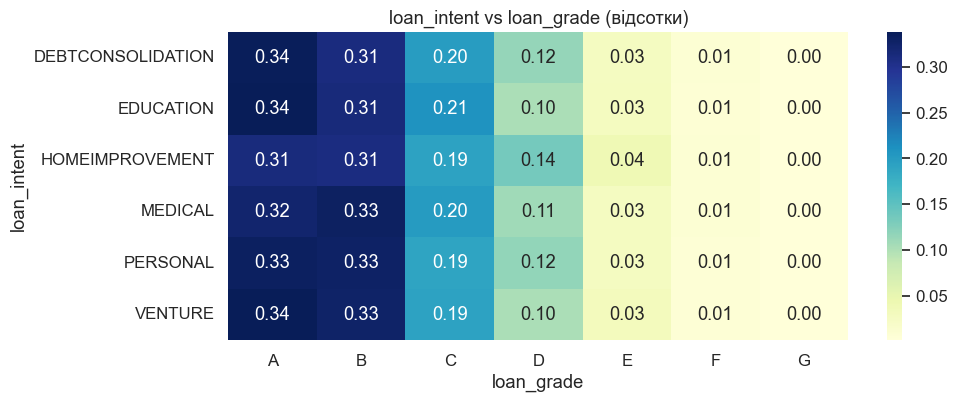


Взаємозв’язок loan_intent vs cb_person_default_on_file (в відсотках):


cb_person_default_on_file         N         Y
loan_intent                                  
DEBTCONSOLIDATION          0.820606  0.179394
EDUCATION                  0.829227  0.170773
HOMEIMPROVEMENT            0.806935  0.193065
MEDICAL                    0.825070  0.174930
PERSONAL                   0.826481  0.173519
VENTURE                    0.826543  0.173457

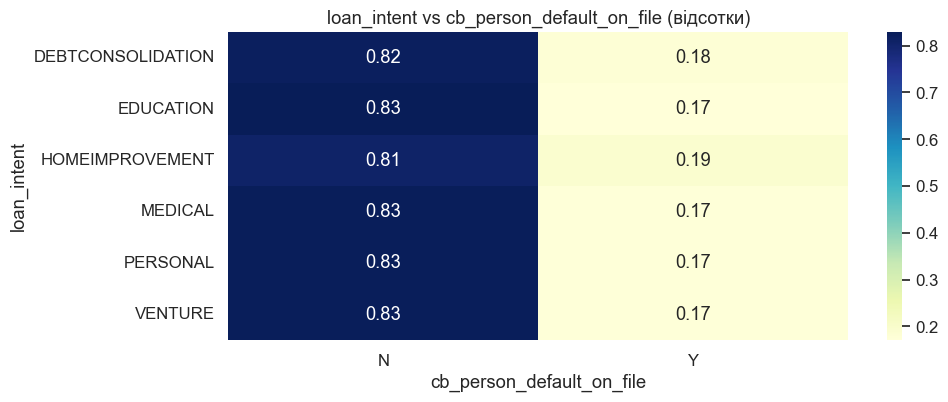


Взаємозв’язок loan_grade vs cb_person_default_on_file (в відсотках):


cb_person_default_on_file         N         Y
loan_grade                                   
A                          1.000000  0.000000
B                          1.000000  0.000000
C                          0.495819  0.504181
D                          0.482625  0.517375
E                          0.517635  0.482365
F                          0.535270  0.464730
G                          0.437500  0.562500

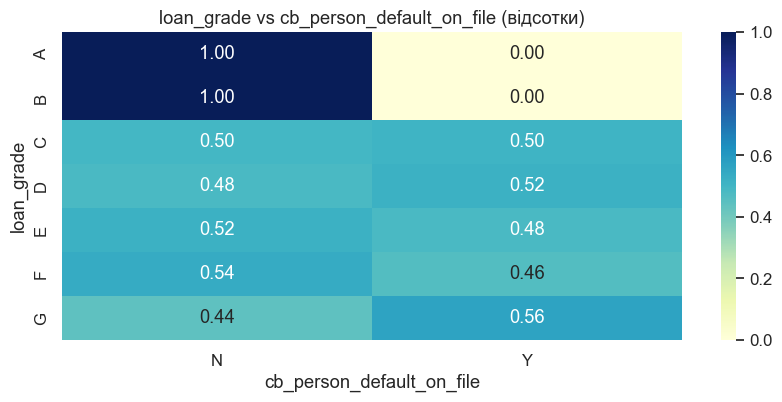

In [30]:
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        cat1 = cat_cols[i]
        cat2 = cat_cols[j]
        ct = pd.crosstab(df[cat1], df[cat2], normalize='index')  # відсотки по рядках
        print(f"\nВзаємозв’язок {cat1} vs {cat2} (в відсотках):")
        display(ct)

        plt.figure(figsize=(10,4))
        sns.heatmap(ct, annot=True, fmt=".2f", cmap="YlGnBu")
        plt.title(f"{cat1} vs {cat2} (відсотки)")
        plt.show()

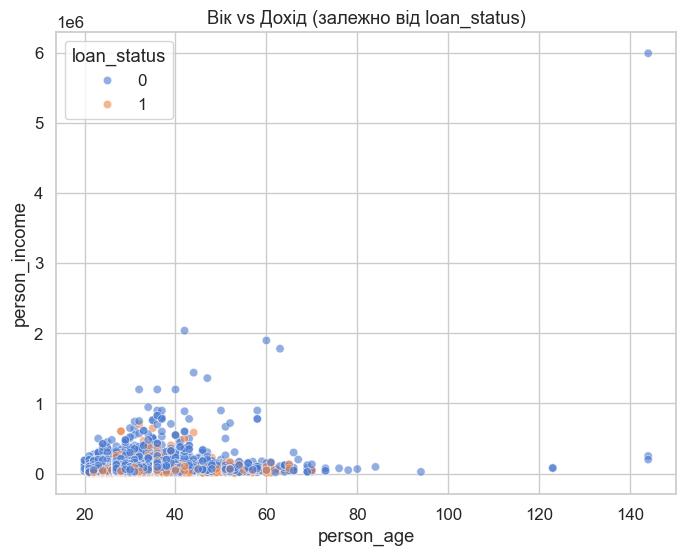

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="person_age", y="person_income", hue="loan_status", data=df, alpha=0.6)
plt.title("Вік vs Дохід (залежно від loan_status)")
plt.show()

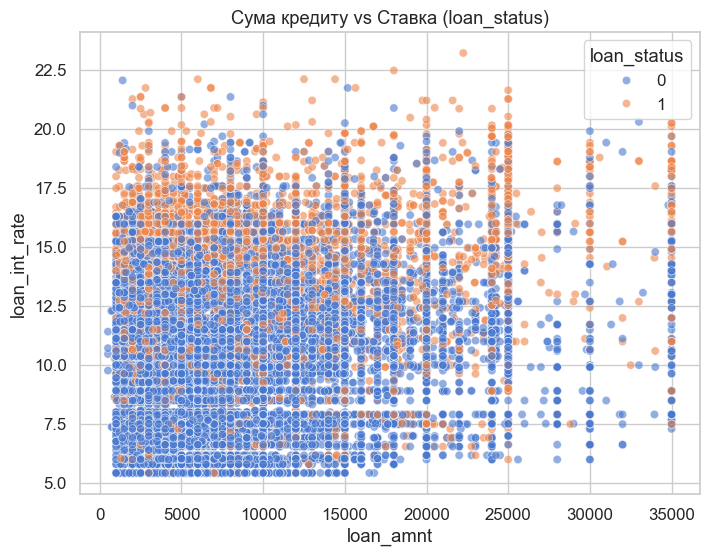

In [36]:
# Сума кредиту і ставка
plt.figure(figsize=(8, 6))
sns.scatterplot(x="loan_amnt", y="loan_int_rate", hue="loan_status", data=df, alpha=0.6)
plt.title("Сума кредиту vs Ставка (loan_status)")
plt.show()

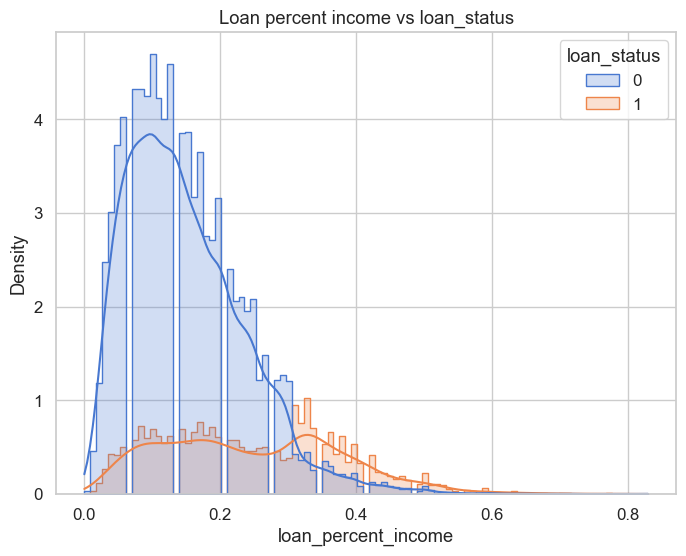

In [37]:
# Відсоток доходу на кредит
plt.figure(figsize=(8, 6))
sns.histplot(df, x="loan_percent_income", hue="loan_status", kde=True, element="step", stat="density")
plt.title("Loan percent income vs loan_status")
plt.show()

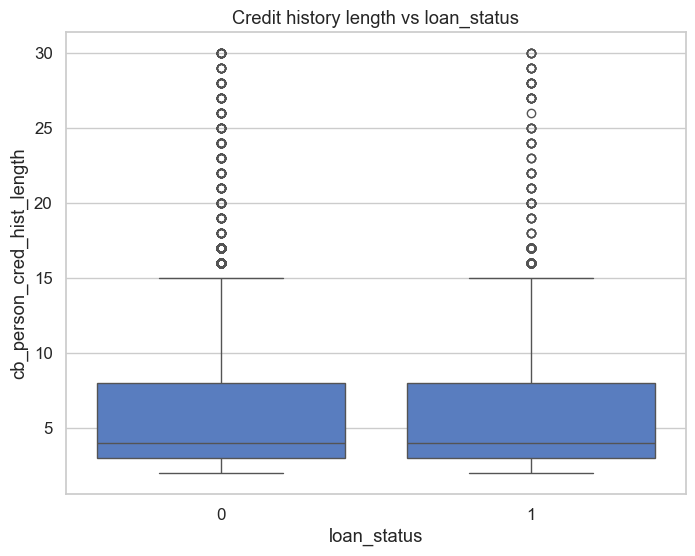

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="loan_status", y="cb_person_cred_hist_length", data=df)
plt.title("Credit history length vs loan_status")
plt.show()